# Assignment 9 (10 Points): Matplotlib

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Q1 (5 points): Reverse engineer the following figure. You are not allowed to use the seaborn commands (e.g., pairplot). Hint: Use the following commands from matplotlib and python:
```
subplots
groupby
for (you might need to use upto three for loops)
if
else
scatter
set_xlabel
set_ylabel
legend
```

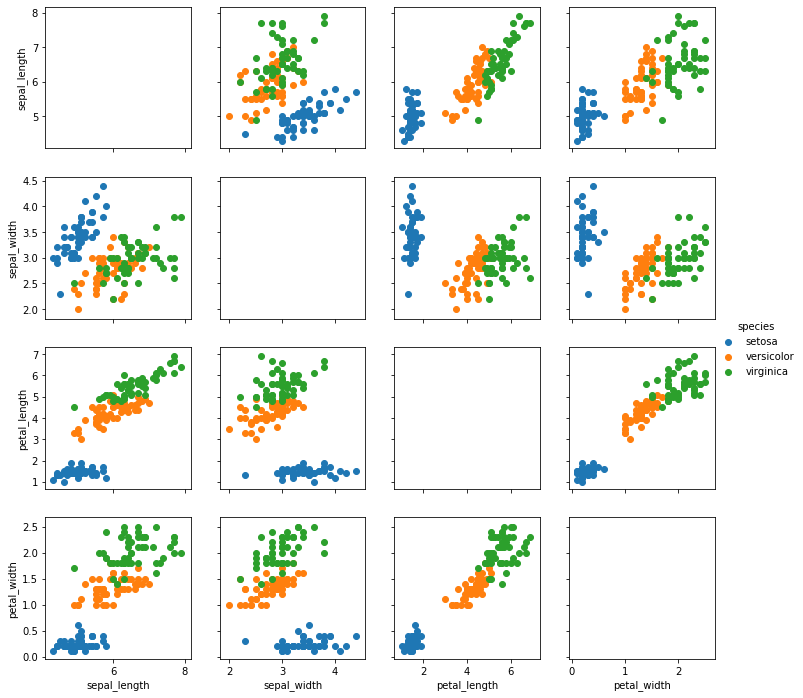

In [3]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, sharex = 'col', sharey = 'row')

#Change settings
fig.set_figwidth(12)
fig.set_figheight(12)

plt.tick_params(
    axis = 'y',          # changes apply to the x-axis
    which = 'both',      # both major & minor ticks are affected
    bottom = True,      # ticks along the bottom edbge are off
    top = True,         # ticks along the top edge are off
    labelbottom = True)

New_Group = iris.groupby(['species'])

for label, df in New_Group:
    if label == 'setosa':
        color = 'blue'
    elif label == 'versicolor':
        color = 'orange'
    else:
        color = 'green'

    for i in range (4):
        for j in range (4):
            
            sl = 'sepal_length'
            sw = 'sepal_width'
            pl = 'petal_length'
            pw = 'petal_width'
            
            row = i
            col = j
            
            if row == 0:
                if col == 1:
                    ax[row,col].scatter(df[sw], df[sl], label = label)
                if col == 2:
                    ax[row,col].scatter(df[pl], df[sl])
                if col == 3:
                    ax[row,col].scatter(df[pw], df[sl])
            
            if row == 1:
                if col == 0:
                    ax[row,col].scatter(df[sl], df[sw])
                if col == 2:
                    ax[row,col].scatter(df[pl], df[sw])
                if col == 3:
                    ax[row,col].scatter(df[pw], df[sw])            
            
            if row == 2:
                if col == 0:
                    ax[row,col].scatter(df[sl], df[pl])
                if col == 1:
                    ax[row,col].scatter(df[sw], df[pl])
                if col == 3:
                    ax[row,col].scatter(df[pw], df[pl])          

            if row == 3:
                if col == 0:
                    ax[row,col].scatter(df[sl], df[pw])
                if col == 1:
                    ax[row,col].scatter(df[sw], df[pw])
                if col == 2:
                    ax[row,col].scatter(df[pl], df[pw])
            
            if row == 3:
                if col == 0:
                    ax[row, col].set_xlabel('sepal_length')
                if col == 1:
                    ax[row, col].set_xlabel('sepal_width') 
                if col == 2:
                    ax[row, col].set_xlabel('petal_length')
                if col == 3:
                    ax[row, col].set_xlabel('petal_width')           
            
            if col == 0:
                if row == 3:
                    ax[row, col].set_ylabel('petal_width')
                if row == 2:
                    ax[row, col].set_ylabel('petal_length') 
                if row == 1:
                    ax[row, col].set_ylabel('sepal_width')
                if row == 0:
                    ax[row, col].set_ylabel('sepal_length')
                    
fig.legend(title = "species", loc = 'right', frameon = False)


### Q2 (2.5 points): Use the seaborn package to generate the following plot.

AttributeError: 'JointGrid' object has no attribute 'set_xlabel'

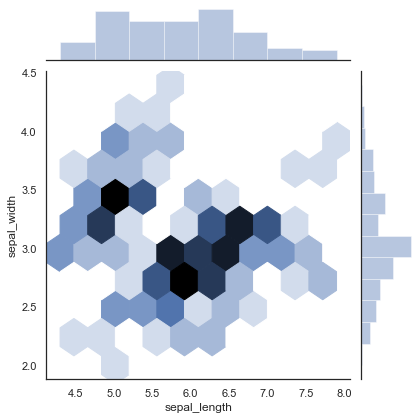

In [31]:
sns.set_style("ticks")
sns.set_style("white")      
New_Plot = sns.jointplot("sepal_length", "sepal_width", kind = "hex", data = iris)
fi.set_xlabel(fontsize=30)
New_Plot.set_ylabel(fontsize=20)

### Q3 (2.5 points): Use the matplotlib package to generate the following plot.

In [5]:
births = pd.read_csv('data/births.csv')

In [6]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

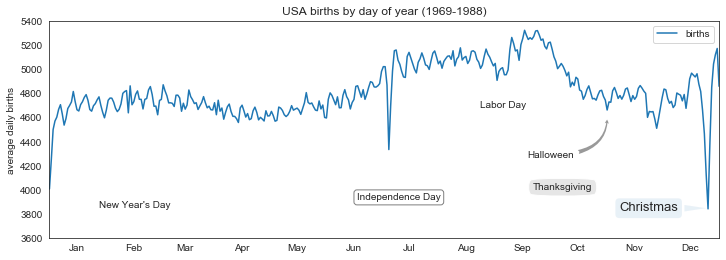

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);